# 3V Bursting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy import tanh as sigmoid

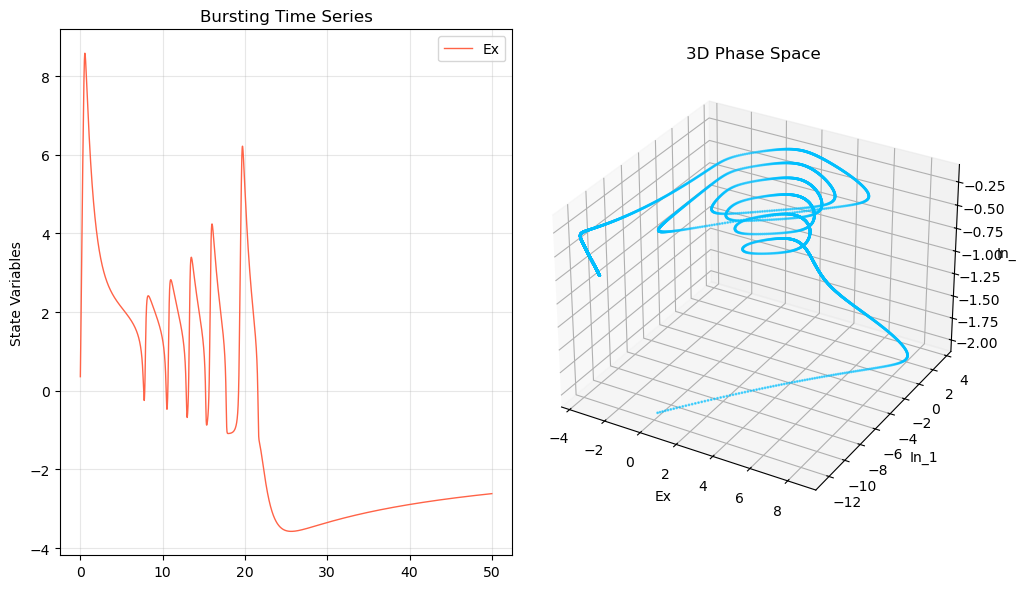

In [36]:
def bursting_system(t, y):
    h_ex, h_in_1, h_in_2, tau_ex, tau_in1, tau_in2, c1, c2, c3, c4, c5, c6, c7 = (
        -2.5, -4.5, 0.5, 1, 2.0, 0.01, 12, 10, 10, 2, 5, 5, 3)
    
    return [
        (h_ex   - y[0] + c1*sigmoid(y[0]) - c2*sigmoid(y[1]) - c7*sigmoid(y[2])) * tau_ex,
        (h_in_1 - y[1] + c3*sigmoid(y[0]) - c4*sigmoid(y[1]))                    * tau_in1, 
        (h_in_2 - y[2] + c5*sigmoid(y[0]) - c6*sigmoid(y[2]))                    * tau_in2
    ]

# Integrate the system
rng = np.random.default_rng(12345)
# y_ini = rng.uniform(size=3)
y_ini = [0.359, -12.325,  -2]

t_end  = 50
t_span = (0, t_end)
t_eval = np.linspace(0, t_end, 10000)
sol = solve_ivp(bursting_system, t_span, y_ini, t_eval=t_eval, method='RK45', max_step=0.05)

# Create comprehensive visualization
fig = plt.figure(figsize=(10, 6))

# 1. Time series - all variables
ax1 = plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], 'tomato', label='Ex', linewidth=1)
# plt.plot(sol.t, sol.y[1], 'g-', label='Medium (y₁)', linewidth=1) 
# plt.plot(sol.t, sol.y[2], 'b-', label='Slow (y₂)', linewidth=2)
plt.ylabel('State Variables')
plt.title('Bursting Time Series')
plt.legend()
plt.grid(True, alpha=0.3)


# 3. 3D Phase Space
ax3 = plt.subplot(1, 2, 2, projection='3d')
# To Color by time:
# colors = plt.cm.viridis(np.linspace(0, 1, len(sol.t)))
ax3.scatter(sol.y[0], sol.y[1], sol.y[2], c='deepskyblue', s=1, alpha=0.6)
ax3.set_xlabel('Ex')
ax3.set_ylabel('In_1') 
ax3.set_zlabel('In_2')
ax3.set_title('3D Phase Space')

plt.tight_layout()
plt.show()

In [17]:
from numpy import around
around(sol.y[:, -1], 3)

array([ -2.359, -12.325,  -0.76 ])

# 3D Interactive Plot

Speed statistics:
Min: 0.039, Max: 35.746, Mean: 2.461


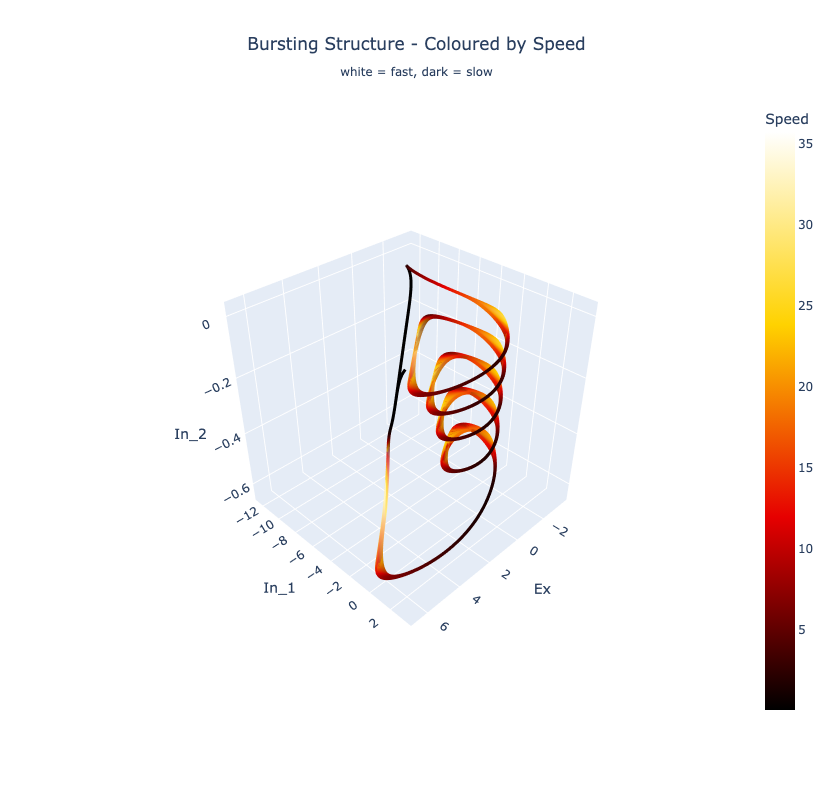


=== Structural Analysis ===
Trajectory range:
  Ex: [-3.58, 6.64]
  In_1: [-12.48, 3.38]
  In_2: [-0.65, 0.02]

Dynamic phases:
  Bursting (fast): 1333 points (13.3%)
  Silent (slow): 8667 points (86.7%)

Fast dynamics typically occur when:
  In_2 ≈ -0.21 ± 0.21
Slow dynamics typically occur when:
  In_2 ≈ -0.39 ± 0.19


In [28]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
from scipy.integrate import solve_ivp
from numpy import tanh as sigmoid

def bursting_system(t, y):
    h_ex, h_in_1, h_in_2, tau_ex, tau_in1, tau_in2, c1, c2, c3, c4, c5, c6, c7 = (
        -2.0, -4.5, 0.5, 1, 2.2, 0.01, 12, 10, 10, 2, 5, 5, 3)
    
    return [
        (h_ex  - y[0] + c1*sigmoid(y[0]) - c2*sigmoid(y[1]) - c7*sigmoid(y[2])) * tau_ex,
        (h_in_1 - y[1] + c3*sigmoid(y[0]) - c4*sigmoid(y[1])) * tau_in1, 
        (h_in_2 - y[2] + c5*sigmoid(y[0]) - c6*sigmoid(y[2])) * tau_in2
    ]

# Integrate the system
rng = np.random.default_rng(12345)
y_ini = rng.uniform(size=3)
y_ini = [-3.13127628, -12.46379042,  -0.45491688]
t_span = (0, 2000)
t_eval = np.linspace(0, 2000, 10000)
sol = solve_ivp(bursting_system, t_span, y_ini, t_eval=t_eval, method='RK45', max_step=0.05)

# Calculate instantaneous speeds (magnitude of velocity vector)
def calculate_speeds(sol):
    speeds = np.zeros(len(sol.t))
    for i in range(len(sol.t)):
        dydt = bursting_system(sol.t[i], sol.y[:, i])
        speeds[i] = np.sqrt(dydt[0]**2 + dydt[1]**2 + dydt[2]**2)
    return speeds

speeds = calculate_speeds(sol)

print(f"Speed statistics:")
print(f"Min: {speeds.min():.3f}, Max: {speeds.max():.3f}, Mean: {speeds.mean():.3f}")


# Create a third plot focusing on the speed structure with better visibility
fig_speed_focus = go.Figure()

# Use lines only for cleaner visualization of the structure
fig_speed_focus.add_trace(go.Scatter3d(
    x=sol.y[0], y=sol.y[1], z=sol.y[2],
    mode='lines',
    line=dict(
        color=speeds,
        colorscale='Hot',
        width=6,
        showscale=True,
        colorbar=dict(title="Speed")
    ),
    name='Speed-colored trajectory'
))

fig_speed_focus.update_layout(
    title=dict(
        text="Bursting Structure - Coloured by Speed<br>"
             "<sub>white = fast, dark = slow</sub>",
        x=0.5
    ),
    scene=dict(
        xaxis_title='Ex',
        yaxis_title='In_1',
        zaxis_title='In_2',
        camera=dict(
            eye=dict(x=1.8, y=1.8, z=1.8)
        )
    ),
    width=1000,
    height=800
)

fig_speed_focus.show()

# fig_speed_focus.write_html("bursting_3D_interactive.html")

# Print some insights about the structure
print("\n=== Structural Analysis ===")
print(f"Trajectory range:")
print(f"  Ex: [{sol.y[0].min():.2f}, {sol.y[0].max():.2f}]")
print(f"  In_1: [{sol.y[1].min():.2f}, {sol.y[1].max():.2f}]")
print(f"  In_2: [{sol.y[2].min():.2f}, {sol.y[2].max():.2f}]")

# Detect bursting phases based on speed variations
speed_threshold = speeds.mean() + 0.5 * speeds.std()
bursting_mask = speeds > speed_threshold
silent_mask = speeds <= speed_threshold

print(f"\nDynamic phases:")
print(f"  Bursting (fast): {np.sum(bursting_mask)} points ({np.mean(bursting_mask)*100:.1f}%)")
print(f"  Silent (slow): {np.sum(silent_mask)} points ({np.mean(silent_mask)*100:.1f}%)")

# Show where fast/slow regions are in state space
print(f"\nFast dynamics typically occur when:")
print(f"  In_2 ≈ {sol.y[2][bursting_mask].mean():.2f} ± {sol.y[2][bursting_mask].std():.2f}")
print(f"Slow dynamics typically occur when:")
print(f"  In_2 ≈ {sol.y[2][silent_mask].mean():.2f} ± {sol.y[2][silent_mask].std():.2f}")

# 3D With Slider

Precomputing trajectories for different tau_in1 values...
Computing 1/15: tau_in1 = 1.70
Computing 2/15: tau_in1 = 1.77
Computing 3/15: tau_in1 = 1.84
Computing 4/15: tau_in1 = 1.91
Computing 5/15: tau_in1 = 1.99
Computing 6/15: tau_in1 = 2.06
Computing 7/15: tau_in1 = 2.13
Computing 8/15: tau_in1 = 2.20
Computing 9/15: tau_in1 = 2.27
Computing 10/15: tau_in1 = 2.34
Computing 11/15: tau_in1 = 2.41
Computing 12/15: tau_in1 = 2.49
Computing 13/15: tau_in1 = 2.56
Computing 14/15: tau_in1 = 2.63
Computing 15/15: tau_in1 = 2.70


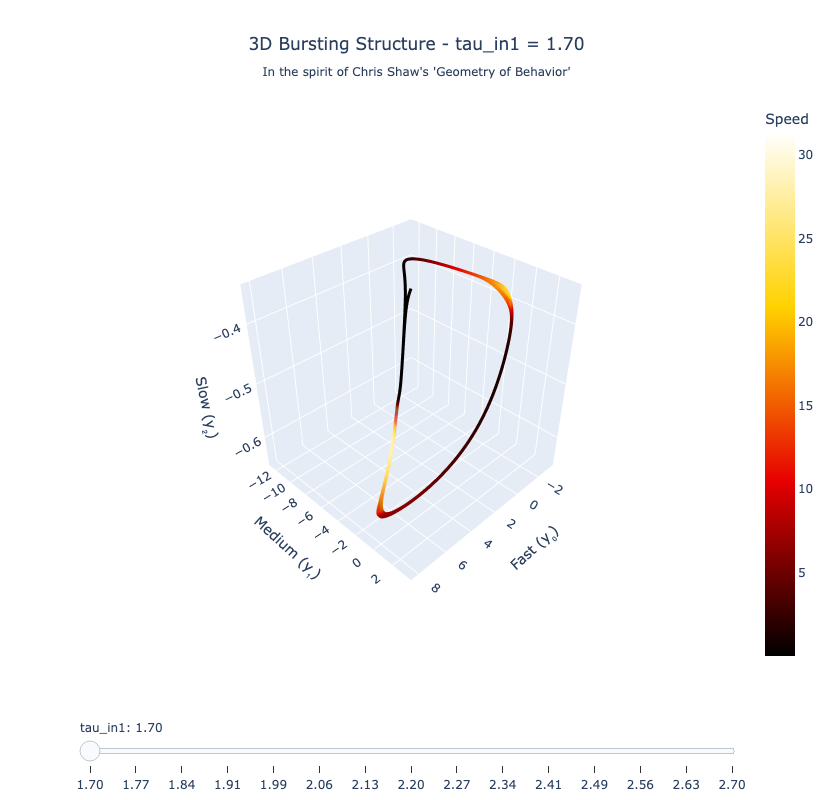


🎨 G.O.S.H. APPROVED!
Chris Shaw's geometric spirit lives on in these interactive visualizations!
Use the sliders to watch the torus winding dance - pure mathematical poetry! 🌊🌀


In [30]:
import plotly.graph_objects as go
import plotly.express as px  # This line was missing!
from plotly.subplots import make_subplots
import numpy as np
from scipy.integrate import solve_ivp
from numpy import tanh as sigmoid

def bursting_system(t, y, tau_in1):
    """Bursting system with tau_in1 as parameter"""
    h_ex, h_in_1, h_in_2, tau_ex, tau_in2, c1, c2, c3, c4, c5, c6, c7 = (
        -2.0, -4.5, 0.5, 1, 0.01, 12, 10, 10, 2, 5, 5, 3)
    
    return [
        (h_ex   - y[0] + c1*sigmoid(y[0]) - c2*sigmoid(y[1]) - c7*sigmoid(y[2])) * tau_ex,
        (h_in_1 - y[1] + c3*sigmoid(y[0]) - c4*sigmoid(y[1])) * tau_in1, 
        (h_in_2 - y[2] + c5*sigmoid(y[0]) - c6*sigmoid(y[2])) * tau_in2
    ]

# Precompute trajectories for different tau_in1 values
tau_in1_values = np.linspace(1.7, 2.7, 15)
trajectories = []
speeds_data = []

print("Precomputing trajectories for different tau_in1 values...")

for i, tau_in1 in enumerate(tau_in1_values):
    print(f"Computing {i+1}/{len(tau_in1_values)}: tau_in1 = {tau_in1:.2f}")
    
    # Integrate system
    rng = np.random.default_rng(12345)
    y_ini = rng.uniform(size=3)
    y_ini = [-3.13127628, -12.46379042,  -0.45491688]
    t_span = (0, 1500)
    t_eval = np.linspace(0, 1500, 8000)
    
    sol = solve_ivp(bursting_system, t_span, y_ini, t_eval=t_eval, 
                   method='RK45', args=(tau_in1,), max_step=0.05)
    
    # Calculate speeds
    speeds = np.zeros(len(sol.t))
    for j in range(len(sol.t)):
        dydt = bursting_system(sol.t[j], sol.y[:, j], tau_in1)
        speeds[j] = np.sqrt(dydt[0]**2 + dydt[1]**2 + dydt[2]**2)
    
    trajectories.append(sol)
    speeds_data.append(speeds)

# Create interactive 3D plot with slider
fig_3d = go.Figure()

for i, (tau_in1, sol, speeds) in enumerate(zip(tau_in1_values, trajectories, speeds_data)):
    visible = (i == 0)
    
    fig_3d.add_trace(go.Scatter3d(
        x=sol.y[0], y=sol.y[1], z=sol.y[2],
        mode='lines',
        line=dict(
            color=speeds,
            colorscale='Hot',
            width=6,
            showscale=True,
            colorbar=dict(title="Speed")
        ),
        name=f'tau_in1 = {tau_in1:.2f}',
        visible=visible
    ))

# Create slider steps for 3D plot
steps_3d = []
for i, tau_in1 in enumerate(tau_in1_values):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(trajectories)},
              {"title": f"3D Bursting Structure - tau_in1 = {tau_in1:.2f}<br>"
                       f"<sub>G.O.S.H.-approved visualization!</sub>"}],  # Credit to the Ghost Of Shaw!
        label=f"{tau_in1:.2f}"
    )
    step["args"][0]["visible"][i] = True
    steps_3d.append(step)

sliders_3d = [dict(
    active=0,
    currentvalue={"prefix": "tau_in1: "},
    pad={"t": 50},
    steps=steps_3d
)]

fig_3d.update_layout(
    title=dict(
        text=f"3D Bursting Structure - tau_in1 = {tau_in1_values[0]:.2f}<br>"
             "<sub>In the spirit of Chris Shaw's 'Geometry of Behavior'</sub>",
        x=0.5
    ),
    scene=dict(
        xaxis_title='Fast (y₀)',
        yaxis_title='Medium (y₁)',
        zaxis_title='Slow (y₂)',
        camera=dict(
            eye=dict(x=1.8, y=1.8, z=1.8)
        )
    ),
    sliders=sliders_3d,
    width=1000,
    height=800
)

fig_3d.show()


print("\n🎨 G.O.S.H. APPROVED!")
print("Chris Shaw's geometric spirit lives on in these interactive visualizations!")
print("Use the sliders to watch the torus winding dance - pure mathematical poetry! 🌊🌀")